<a href="https://colab.research.google.com/github/beotavalo/ml-zoomcamp/blob/main/Homework_4_Evaluation_Metrics_for_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
!unzip bank+marketing.zip
!unzip bank.zip

--2024-10-22 22:32:10--  https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank+marketing.zip.1’

bank+marketing.zip.     [ <=>                ] 999.85K  5.93MB/s    in 0.2s    

2024-10-22 22:32:11 (5.93 MB/s) - ‘bank+marketing.zip.1’ saved [1023843]

Archive:  bank+marketing.zip
replace bank.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: bank.zip                
replace bank-additional.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: bank-additional.zip     
Archive:  bank.zip
replace bank-full.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: bank-full.csv           
replace bank-names.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: bank-names.txt          
replace bank.csv? [y]es, [n]o, [A]ll, [

In [7]:

import pandas as pd

# Define the column names
column_names = [
    'age',
    'job',
    'marital',
    'education',
    'balance',
    'housing',
    'contact',
    'day',
    'month',
    'duration',
    'campaign',
    'pdays',
    'previous',
    'poutcome',
    'y'
]


In [8]:
# Read the CSV file with specified columns
df = pd.read_csv('bank-full.csv', sep=';', names=column_names, header=0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 45211 entries, (58, 'management') to (37, 'entrepreneur')
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  object
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  int64 
 4   balance    45211 non-null  object
 5   housing    45211 non-null  object
 6   contact    45211 non-null  object
 7   day        45211 non-null  int64 
 8   month      45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.3+ MB


In [10]:
# Print some info or use the dataframe as needed
df.tail()

,,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [12]:
"""
Split the data into 3 parts:
train            60%
validation       20%
test             20%
Use train_test_split function for that with random_state=1

"""
from sklearn.model_selection import train_test_split

# Split data into train and test sets (80% train, 20% test)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=1)

# Further split the train data into train and validation sets (75% train, 25% validation)
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=1)

# Print the shapes of the resulting datasets
print("Train dataset shape:", train_df.shape)
print("Validation dataset shape:", val_df.shape)
print("Test dataset shape:", test_df.shape)

Train dataset shape: (27126, 15)
Validation dataset shape: (9042, 15)
Test dataset shape: (9043, 15)


Question 1: ROC AUC feature importance

In [13]:
# ROC AUC

from sklearn.metrics import roc_auc_score

df_train = train_df.copy()

numerical_features = df_train.select_dtypes(include=['number']).columns.tolist()

feature_importance = {}

for feature in numerical_features:
  if feature == 'y':
    continue
  auc = roc_auc_score(df_train['y'], df_train[feature])
  if auc < 0.5:
    auc = roc_auc_score(df_train['y'], -df_train[feature])
    if auc >= 0.5:
      feature_importance[feature] = auc
      print(f"Inverted {feature}, AUC: {auc}")
    else:
      print(f"Could not improve AUC for {feature}")

  else:
    feature_importance[feature] = auc

print("Feature Importance (AUC):")
for feature, auc in feature_importance.items():
  print(f"{feature}: {auc}")

Inverted day, AUC: 0.525957882383908
Inverted campaign, AUC: 0.5714543015682159
Feature Importance (AUC):
education: 0.5888313805382317
day: 0.525957882383908
duration: 0.8147002759670778
campaign: 0.5714543015682159
pdays: 0.5901276247352144
previous: 0.5985653242764153


2. What's the AUC of this model on the validation dataset?

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

# Prepare the data for one-hot encoding
categorical_features = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']
X_train = train_df.drop('y', axis=1)
y_train = train_df['y']
X_val = val_df.drop('y', axis=1)
y_val = val_df['y']

# Convert the data to dictionaries
train_dicts = X_train[categorical_features].to_dict(orient='records')
val_dicts = X_val[categorical_features].to_dict(orient='records')

# Apply one-hot encoding using DictVectorizer
dv = DictVectorizer(sparse=False)
X_train_encoded = dv.fit_transform(train_dicts)
X_val_encoded = dv.transform(val_dicts)

# Train the logistic regression model
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train_encoded, y_train)

# Make predictions on the validation dataset
y_pred_proba = model.predict_proba(X_val_encoded)[:, 1]

# Calculate the AUC on the validation dataset
auc = roc_auc_score(y_val, y_pred_proba)

print(f"AUC on validation dataset: {auc}")

AUC on validation dataset: 0.754420056974413


3. At which threshold precision and recall curves intersect?

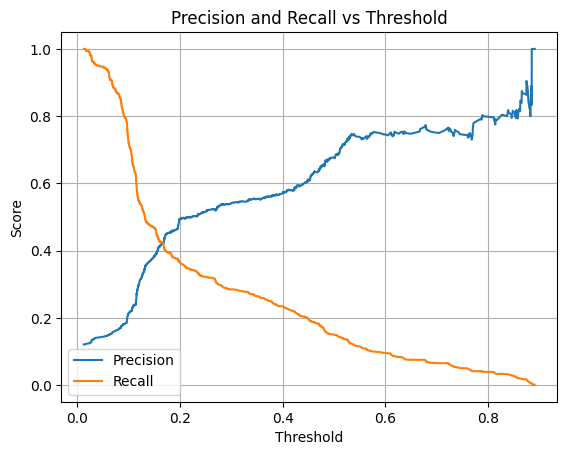

Precision and Recall curves intersect at approximately threshold: 0.16752092021880344


In [22]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_val_numeric = y_val.map({'no': 0, 'yes': 1})

# Calculate precision, recall, and thresholds using the numerical y_val
precision, recall, thresholds = precision_recall_curve(y_val_numeric, y_pred_proba)

plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

# Find the threshold where precision and recall intersect
closest_threshold = None
min_diff = float('inf')

for i in range(len(precision) - 1):
  diff = abs(precision[i] - recall[i])
  if diff < min_diff:
    min_diff = diff
    closest_threshold = thresholds[i]

print(f"Precision and Recall curves intersect at approximately threshold: {closest_threshold}")

4. At which threshold F1 is maximal?

In [24]:
# Calculate F1 score for different thresholds
f1_scores = []
thresholds = []
for threshold in [i/100 for i in range(101)]:
  y_pred = (y_pred_proba >= threshold).astype(int)

  tp = ((y_val_numeric == 1) & (y_pred == 1)).sum()
  fp = ((y_val_numeric == 0) & (y_pred == 1)).sum()
  fn = ((y_val_numeric == 1) & (y_pred == 0)).sum()

  if tp + fp == 0:
    precision = 0
  else:
    precision = tp / (tp + fp)
  if tp + fn == 0:
    recall = 0
  else:
    recall = tp / (tp + fn)

  if precision + recall == 0:
    f1 = 0
  else:
    f1 = 2 * precision * recall / (precision + recall)

  f1_scores.append(f1)
  thresholds.append(threshold)

# Find the threshold with maximal F1 score
max_f1_score = max(f1_scores)
max_f1_threshold = thresholds[f1_scores.index(max_f1_score)]

print(f"Maximal F1 score: {max_f1_score}")
print(f"Threshold for maximal F1 score: {max_f1_threshold}")

Maximal F1 score: 0.4208367514356029
Threshold for maximal F1 score: 0.15


5. How large is standard deviation of the scores across different folds?

In [27]:
# How large is standard deviation of the scores across different folds?
import numpy as np
from sklearn.model_selection import KFold

df_full_train = pd.concat([train_df, val_df])

# Prepare the data for one-hot encoding
categorical_features = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

# Initialize KFold cross-validator
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

# Create lists to store the AUC scores for each fold
scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train['y']
    y_val = df_val['y']

    train_dicts = df_train[categorical_features].to_dict(orient='records')
    val_dicts = df_val[categorical_features].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dicts)
    X_val = dv.transform(val_dicts)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

std_deviation = np.std(scores)
print(f"Standard deviation of AUC scores: {std_deviation}")

Standard deviation of AUC scores: 0.008525272968185385


6. Which C leads to the best mean score?

In [29]:
# Which C leads to the best mean score?

df_full_train = pd.concat([train_df, val_df])

# Prepare the data for one-hot encoding
categorical_features = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

# Initialize KFold cross-validator
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

C_values = [0.000001, 0.001, 1]

results = {}

for C in C_values:
    scores = []
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train['y']
        y_val = df_val['y']

        train_dicts = df_train[categorical_features].to_dict(orient='records')
        val_dicts = df_val[categorical_features].to_dict(orient='records')

        dv = DictVectorizer(sparse=False)
        X_train = dv.fit_transform(train_dicts)
        X_val = dv.transform(val_dicts)

        model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
        model.fit(X_train, y_train)

        y_pred = model.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    mean_score = np.mean(scores)
    std_score = np.std(scores)

    results[C] = (round(mean_score, 3), round(std_score, 3))

best_c = max(results, key=lambda k: results[k][0])
print(f"The best C value is: {best_c}")

The best C value is: 1
